In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from colorama import Fore
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("C:/Users/sanat/Downloads/Aquifer_Petrignano.csv")
data

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [5]:
# Remove old rows
data = data[data.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
data = data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [6]:
data.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in data.columns if feature not in targets]
data.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [7]:
from datetime import datetime,date
data['date']=pd.to_datetime(data['date'],format='%d/%m/%Y')
data.head().style.set_properties(subset=['date'], **{'background-color': 'Black'})

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


## Data Visualization
#### Features:
* Rainfall indicates the quantity of rain fallin (mm).
* Temperature indicates the temperatue (°).
* Volume indicates the volume of water taken from the drinking water treatment plnt
* Hydrometry indicates the groundwater lvel.(m)
* Target:
 > Depth to Groundwater indicates the groundwater level (m from the ground** floor)

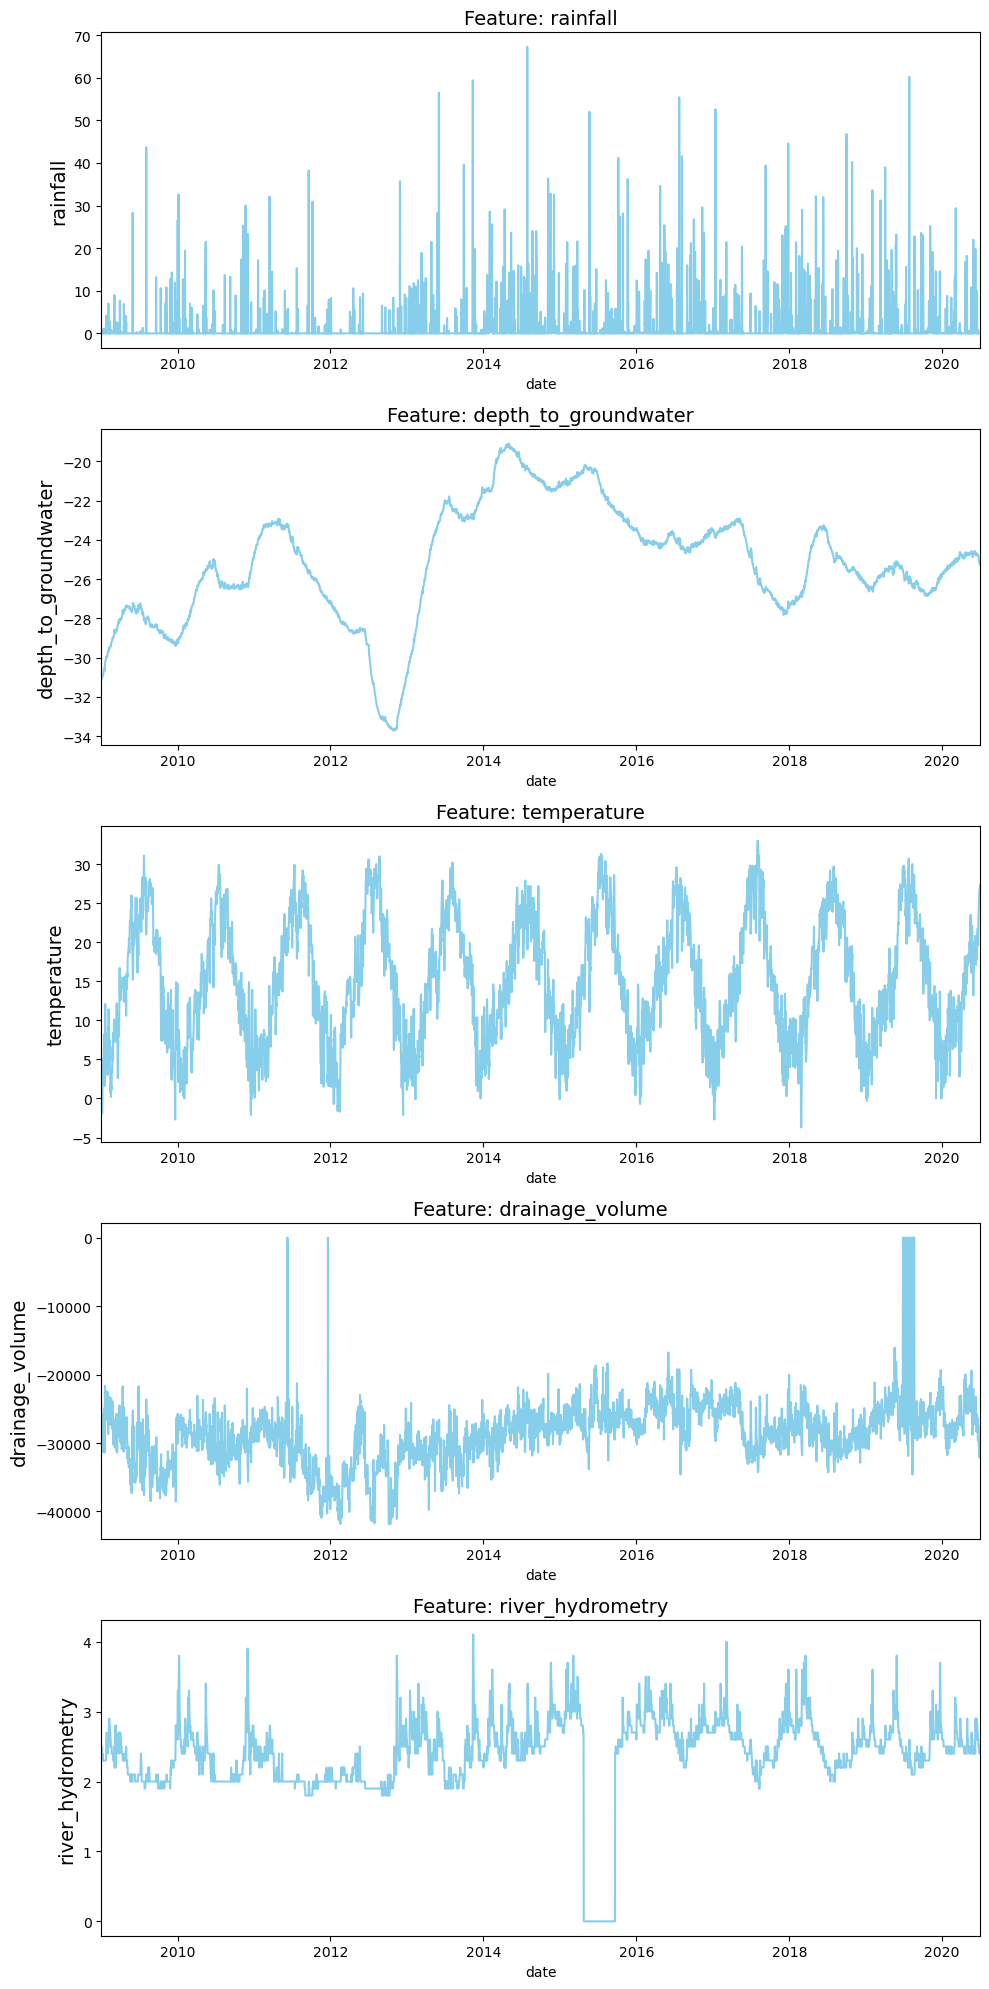

In [8]:
# Create a figure with 5 subplots arranged vertically
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

# Extract the column names to plot
columns = data.drop('date', axis=1).columns

# Loop through each column to create a line plot
for i, column in enumerate(columns):
    # Fill NaN values using forward fill
    filled_data = data[column].fillna(method='ffill')
    
    # Plot the data
    sns.lineplot(x=data['date'], y=filled_data, ax=axes[i], color='skyblue')
    
    # Set the title and labels
    axes[i].set_title(f'Feature: {column}', fontsize=14)
    axes[i].set_ylabel(column, fontsize=14)
    
    # Set the x-axis limits
    axes[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Display the plot
plt.tight_layout()
plt.show()

## Data Preprocessing 
### Chronological Order and Equidistant Timestamps
The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the dat..

But, first of all, lets see how to check if our dataset is correctly formated!

In [9]:
data = data.sort_values(by='date')

# Check time intervals
data['delta'] = data['date'] - data['date'].shift(1)

data[['date', 'delta']].head()

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [10]:
data['delta'].sum(), data['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

#### Handling Null values

In [11]:
data.drop('delta',axis=1,inplace=True)
data.isnull().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

(14245.0, 18443.0)

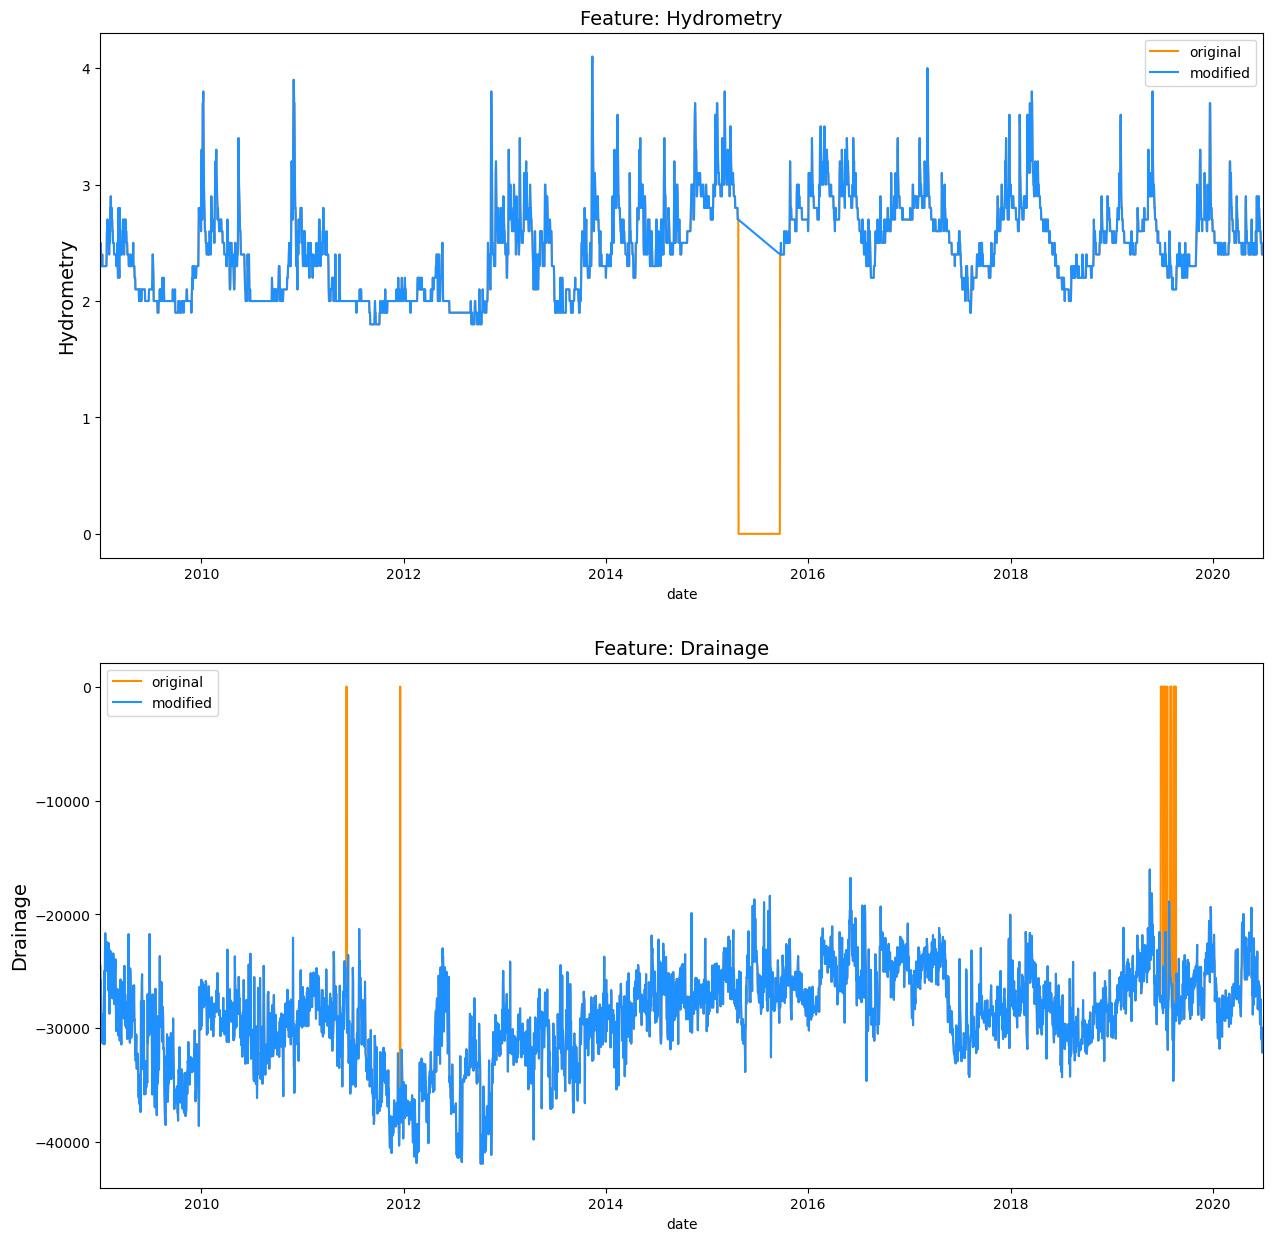

In [12]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = data['river_hydrometry'].copy()
data['river_hydrometry'] = data['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=data['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=data['date'], y=data['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = data['drainage_volume'].copy()
data['drainage_volume'] = data['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=data['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

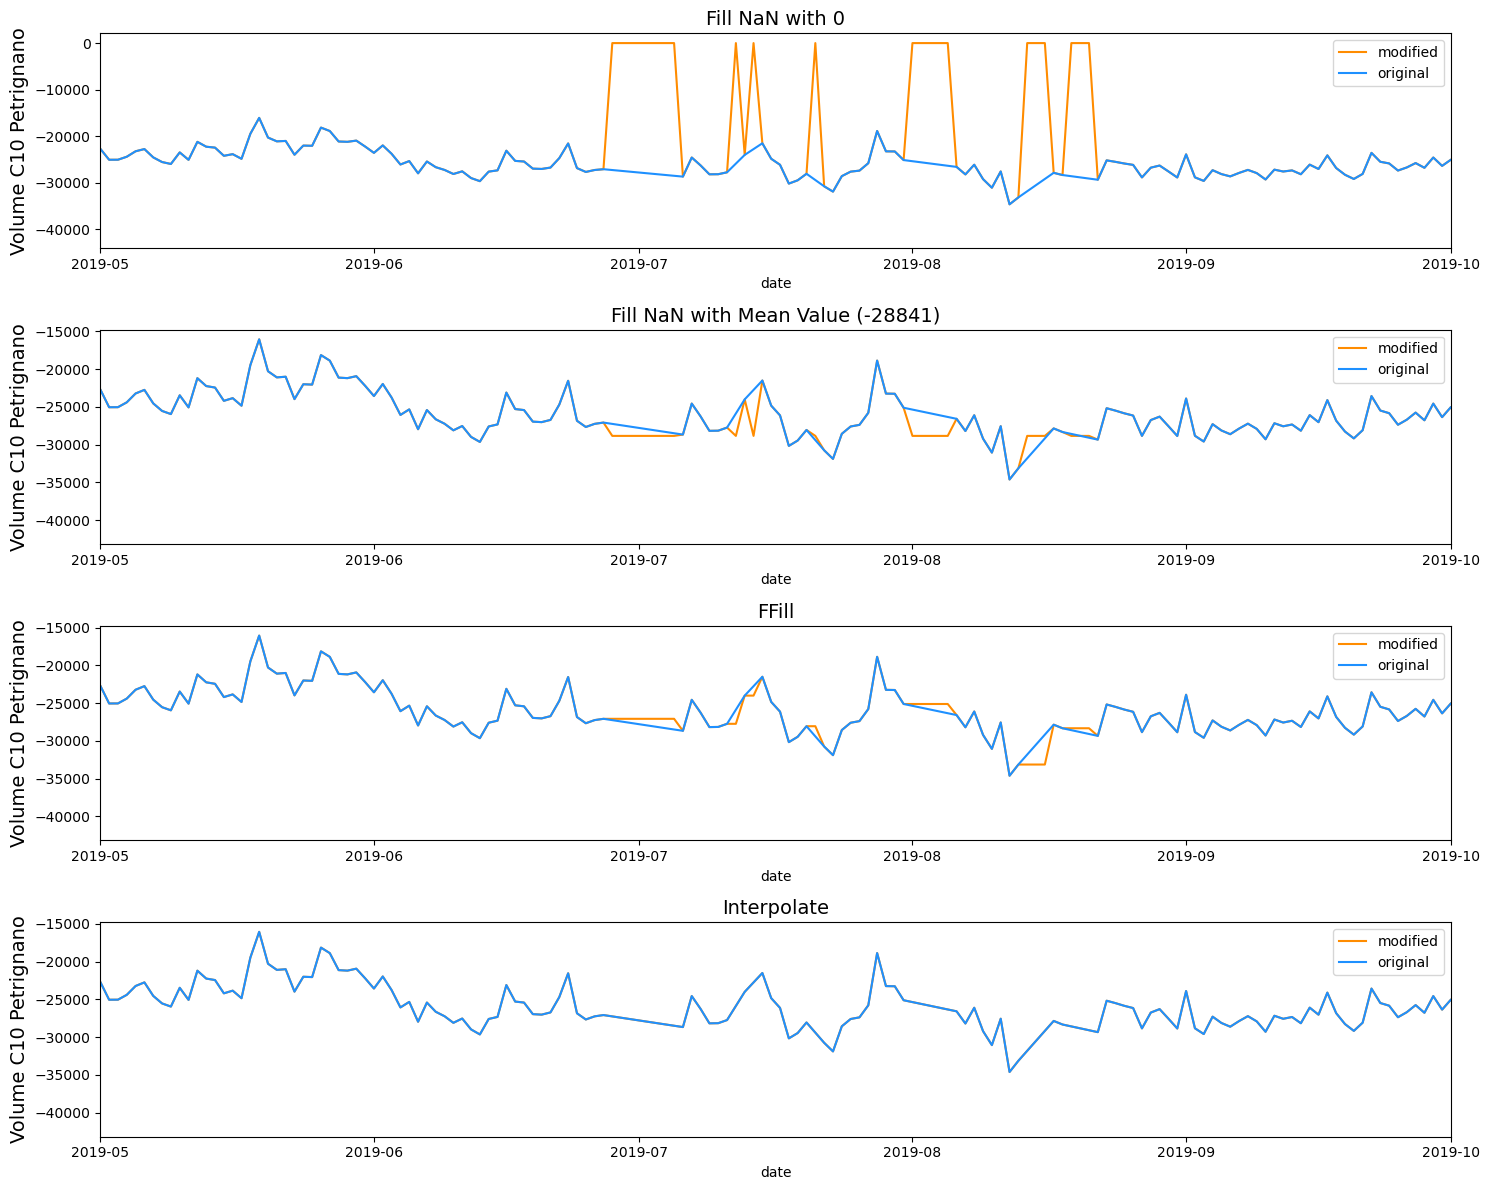

In [13]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = data['drainage_volume'].mean()
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=data['date'], y=data['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=data['date'], y=data['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [14]:
data['drainage_volume'] = data['drainage_volume'].interpolate()
data['river_hydrometry'] = data['river_hydrometry'].interpolate()
data['depth_to_groundwater'] = data['depth_to_groundwater'].interpolate()

### Smoothing Data

Resampling can provide additional information on the data. There are two types of resampling:

* Upsampling is when the frequency of samples is increased (e.g. days to hours)
* Downsampling is when the frequency of samples is decreased (e.g. days to weeks)
In this example, we will do some downsampling with the .resample() function (similar to groupby and aggregate as mean).

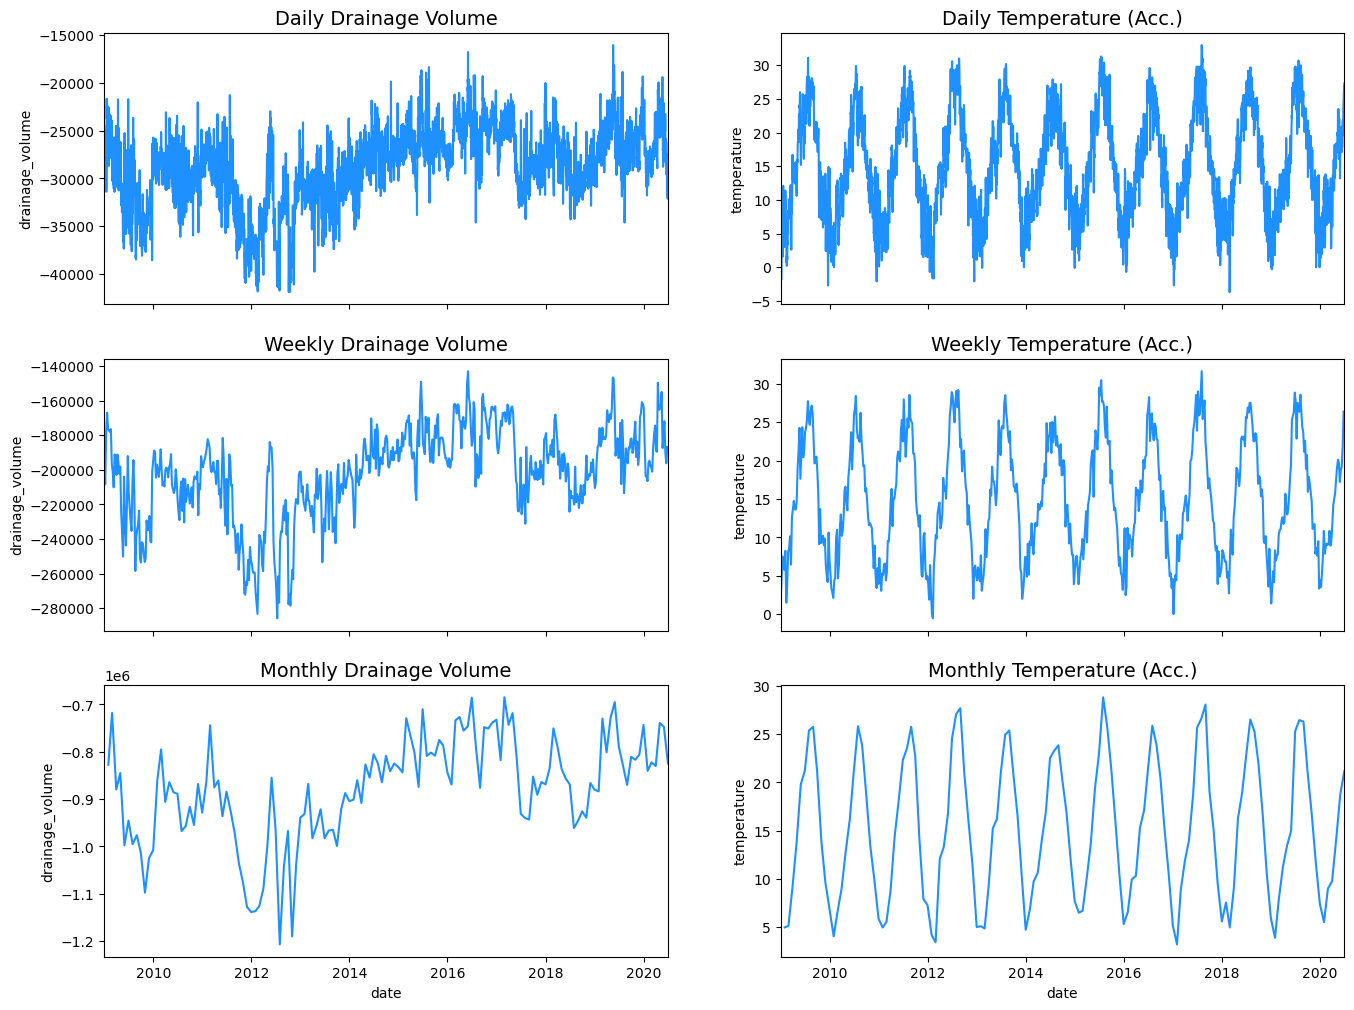

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16, 12))

# Plot daily drainage volume
sns.lineplot(data=data, x='date', y='drainage_volume', color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily Drainage Volume', fontsize=14)

# Plot weekly drainage volume
resampled_df = data[['date', 'drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(data=resampled_df, x='date', y='drainage_volume', color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

# Plot monthly drainage volume
resampled_df = data[['date', 'drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(data=resampled_df, x='date', y='drainage_volume', color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

# Set x-axis limits for drainage volume plots
for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Plot daily temperature
sns.lineplot(data=data, x='date', y='temperature', color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

# Plot weekly temperature
resampled_df = data[['date', 'temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(data=resampled_df, x='date', y='temperature', color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

# Plot monthly temperature
resampled_df = data[['date', 'temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(data=resampled_df, x='date', y='temperature', color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

# Set x-axis limits for temperature plots
for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

In [16]:
# As we can see, downsample to weekly could smooth the data and hgelp with analysis
downsample = data[['date',
                 'depth_to_groundwater', 
                 'temperature',
                 'drainage_volume', 
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='date').mean().reset_index(drop=False)
data = downsample.copy()

### Stationary check

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

1. constant mean and mean is not time-dependent
2. constant variance and variance is not time-dependent
3. constant covariance and covariance is not time-dependent

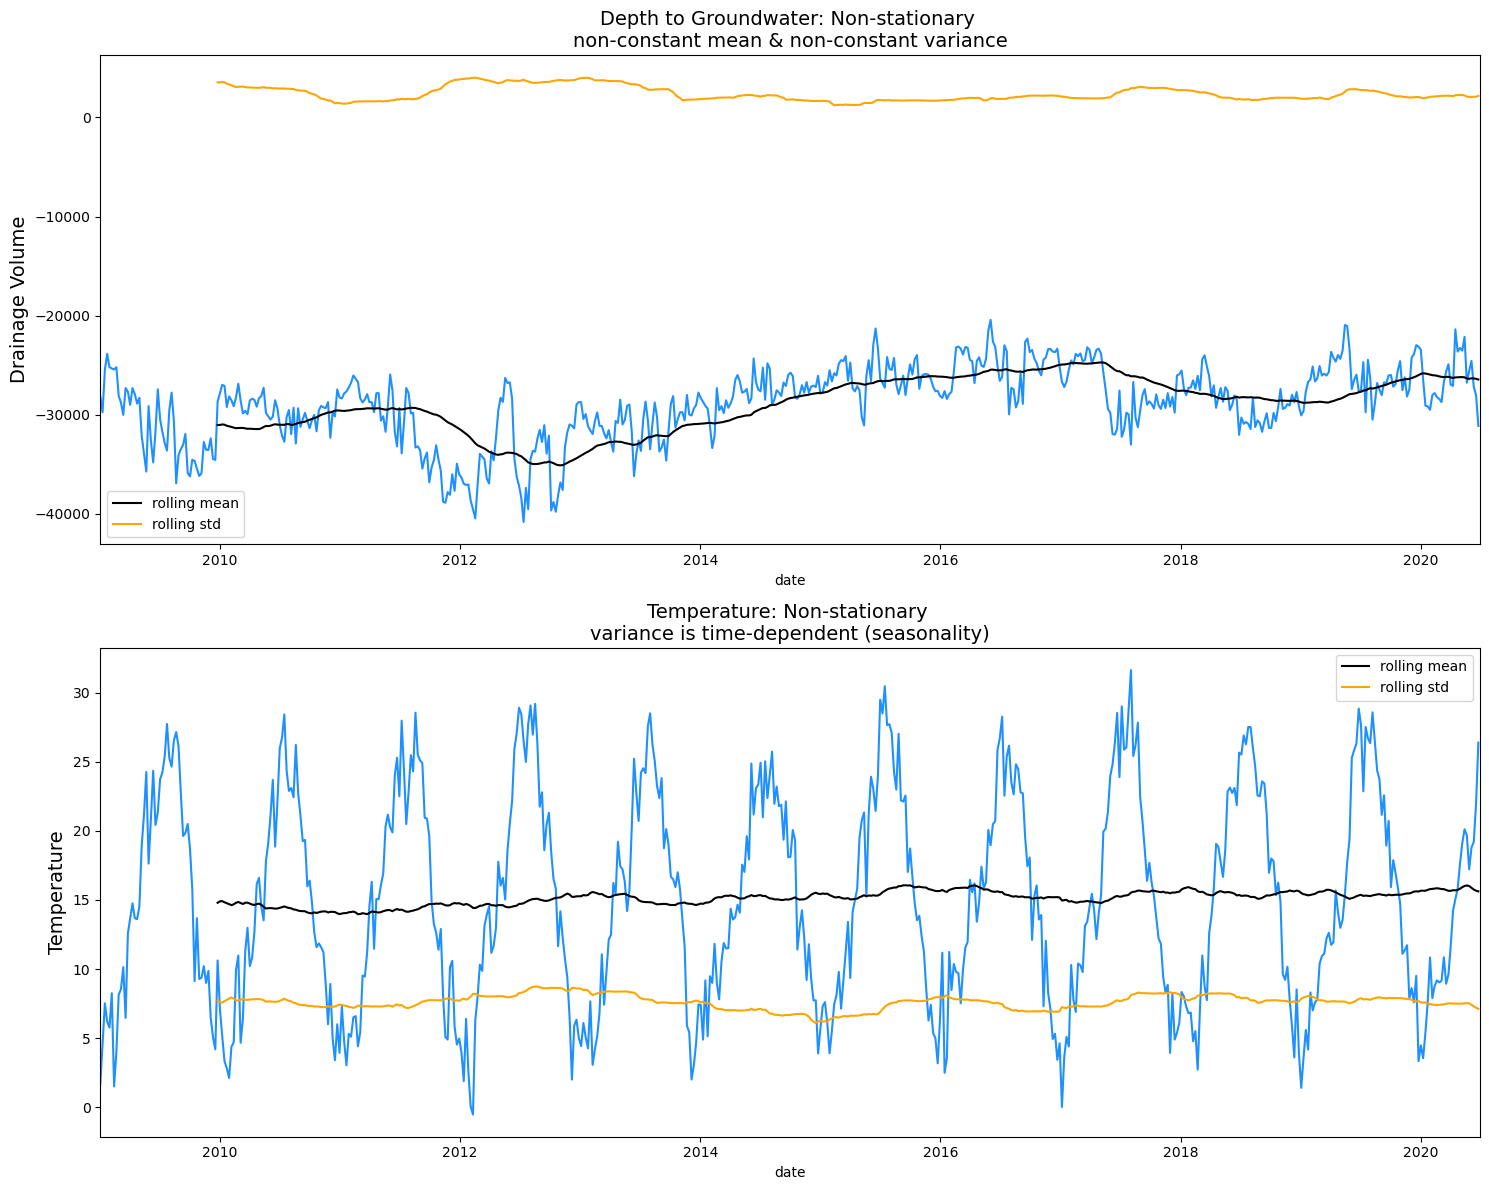

In [17]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=data['date'], y=data['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=data['date'], y=data['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=data['date'], y=data['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=data['date'], y=data['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=data['date'], y=data['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=data['date'], y=data['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()


### Augmented Dickey-Fuller (ADF) Test
Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

* Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

* Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

**If the null hypothesis can be rejected, we can conclude that the time series is stationary.**

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['depth_to_groundwater'].values)
result

(-2.880201649316654,
 0.04769919092020962,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877616)

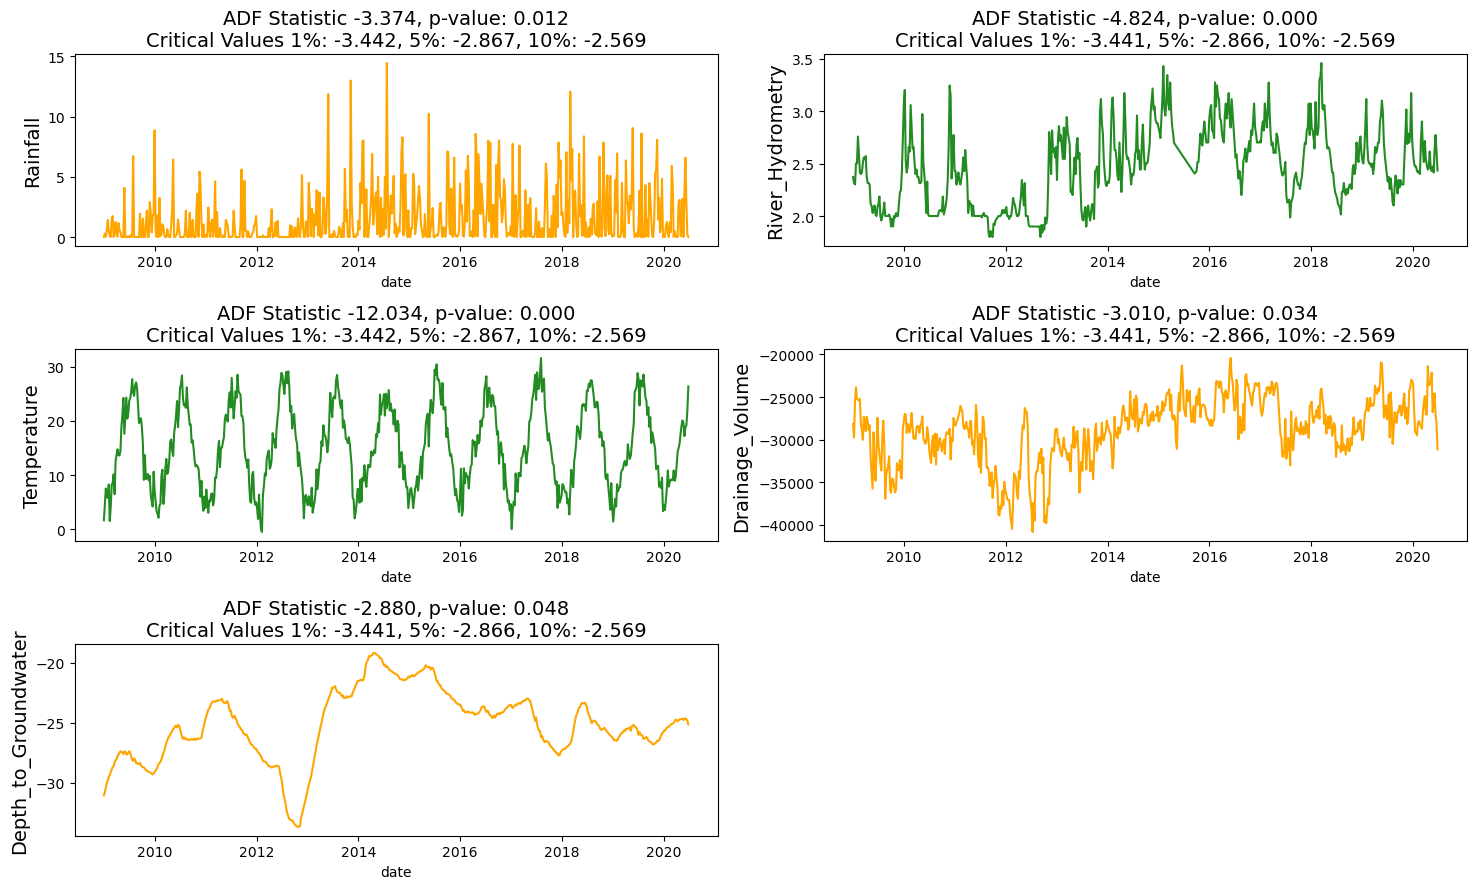

In [19]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=data['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(data['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(data['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(data['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(data['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(data['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:

Transformation: e.g. log or square root to stabilize non-constant variance
Differencing: subtracts the current value from the previous

<Axes: xlabel='depth_to_groundwater_log', ylabel='Density'>

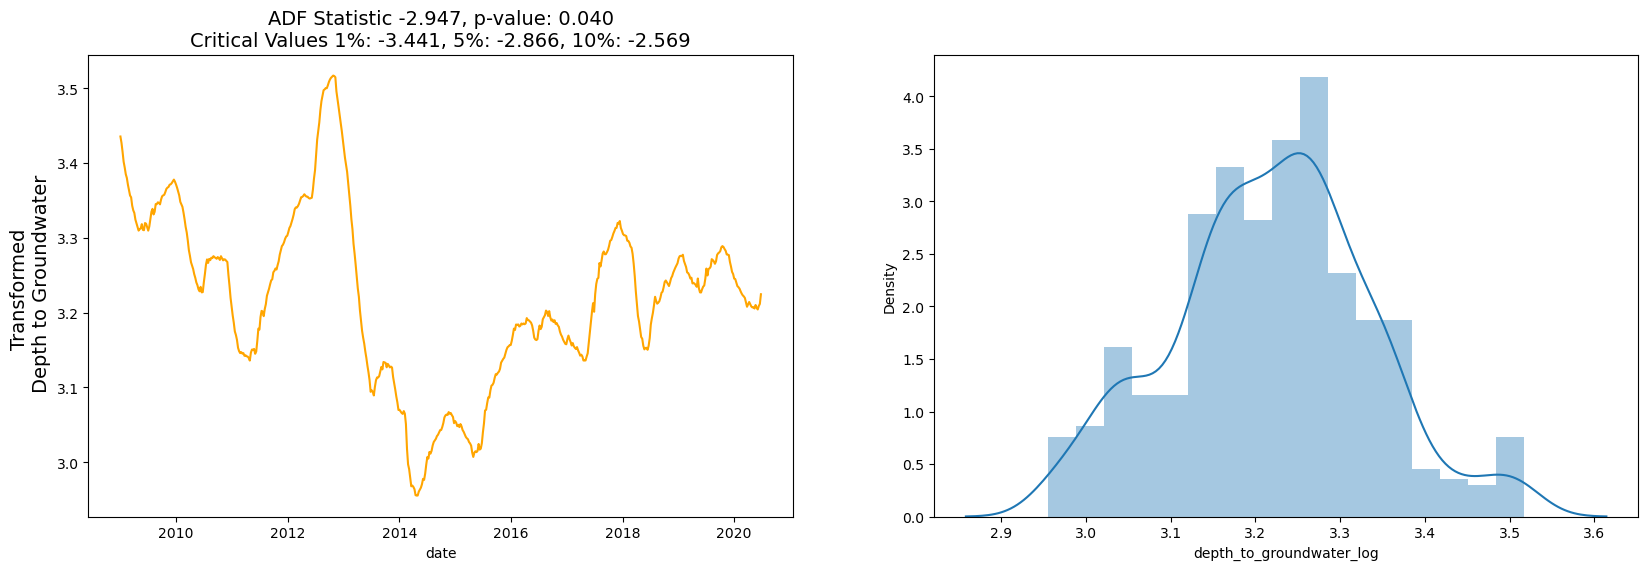

In [20]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
data['depth_to_groundwater_log'] = np.log(abs(data['depth_to_groundwater']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(data['depth_to_groundwater_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(data['depth_to_groundwater_log'], ax=ax[1])

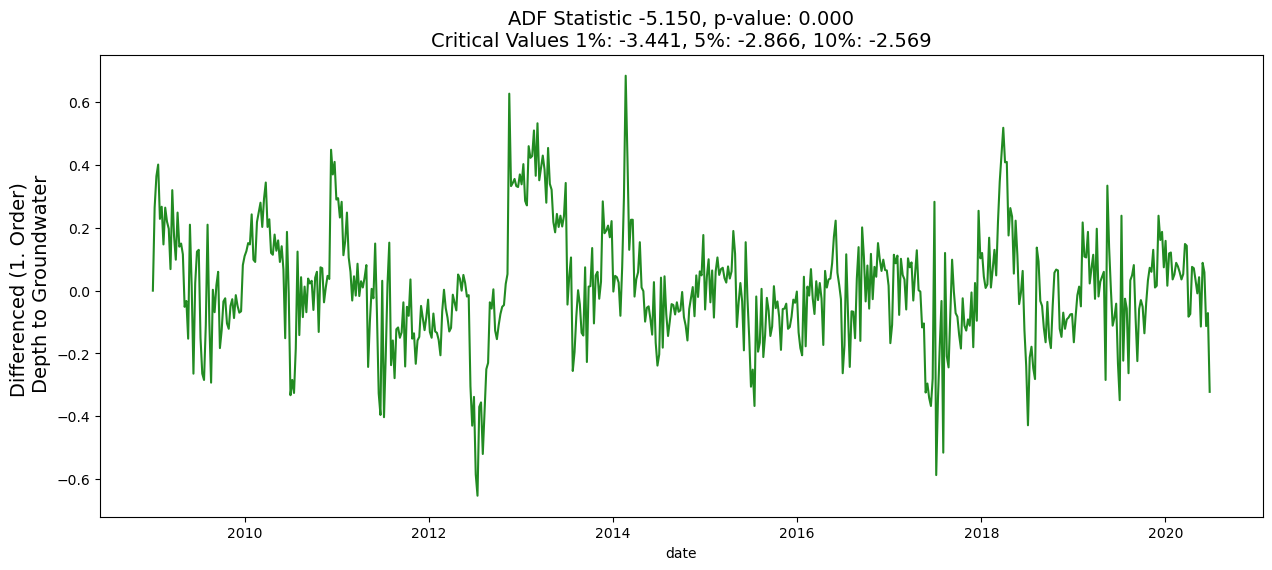

In [21]:
# First Order Differencing
ts_diff = np.diff(data['depth_to_groundwater'])
data['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(data['depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

## Feature Engineering

In [22]:
data['date'].dt.isocalendar().week

0       1
1       2
2       3
3       4
4       5
       ..
595    22
596    23
597    24
598    25
599    26
Name: week, Length: 600, dtype: UInt32

In [23]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data['day_of_year'] = pd.DatetimeIndex(data['date']).dayofyear
data['week_of_year'] = data['date'].dt.isocalendar().week
data['quarter'] = pd.DatetimeIndex(data['date']).quarter
data['season'] = data['month'] % 12 // 3 + 1

data[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2009-01-01,2009,1,1,1,1,1,1
1,2009-01-08,2009,1,8,8,2,1,1
2,2009-01-15,2009,1,15,15,3,1,1
3,2009-01-22,2009,1,22,22,4,1,1
4,2009-01-29,2009,1,29,29,5,1,1


### Encoding Cyclical function
The new time features are cyclical. For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the month feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

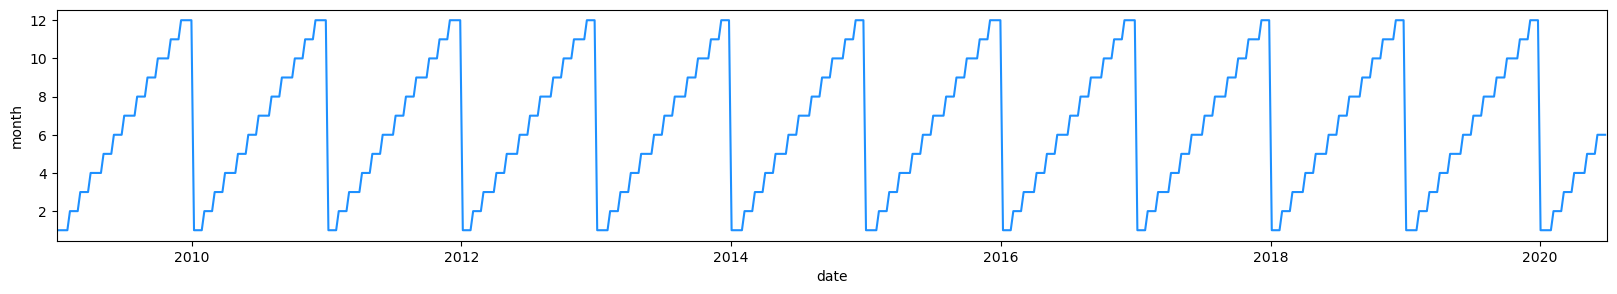

In [24]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=data['date'], y=data['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()


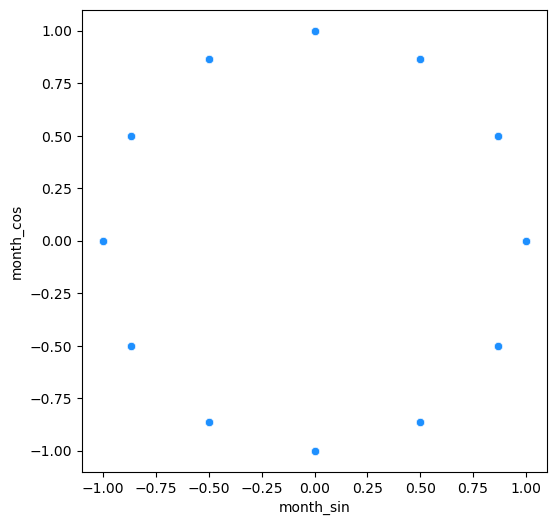

In [25]:
month_in_year = 12
data['month_sin'] = np.sin(2*np.pi*data['month']/month_in_year)
data['month_cos'] = np.cos(2*np.pi*data['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=data.month_sin, y=data.month_cos, color='dodgerblue')
plt.show()

### Timeseries Decompostion
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

1. Level: The average value in the series. 
2. Trend: The increasing or decreasing value in the series.
3. Seasonality: The repeating short-term cycle in the series.
4. Noise: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(data[column], period=52, model='additive', extrapolate_trend='freq')
    data[f"{column}_trend"] = decomp.trend
    data[f"{column}_seasonal"] = decomp.seasonal

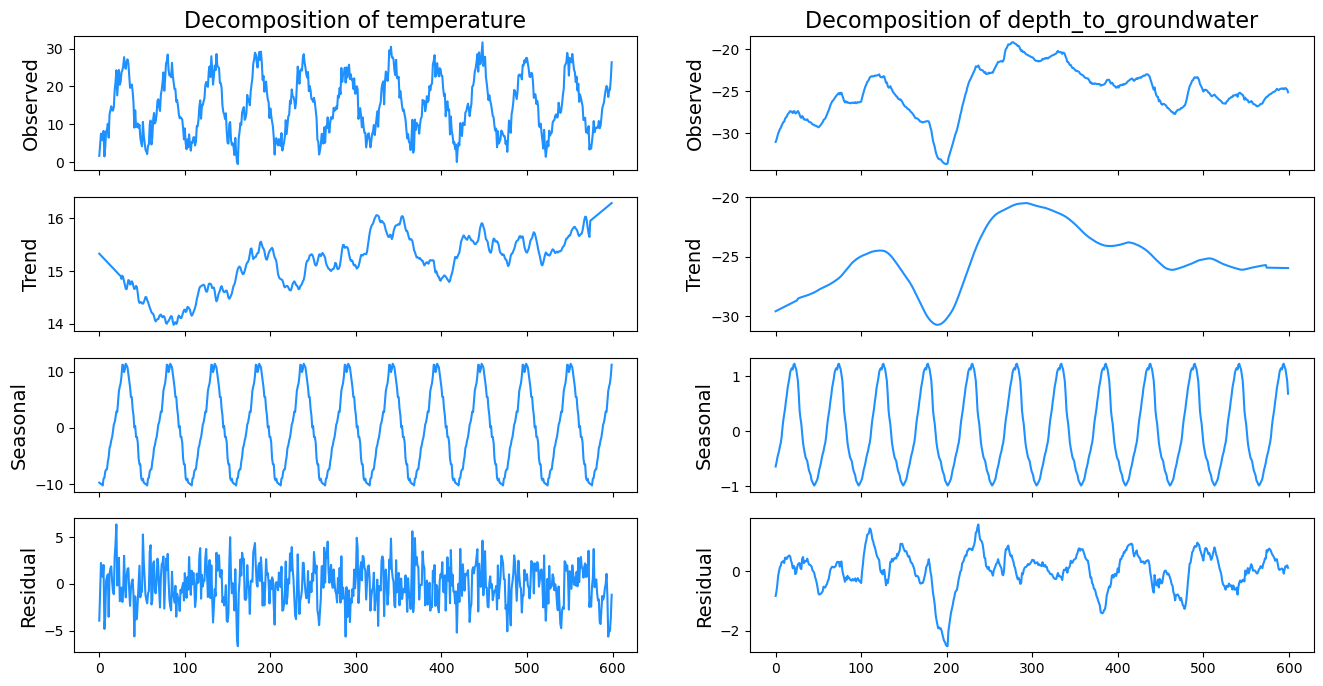

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['temperature', 'depth_to_groundwater']):
    
    res = seasonal_decompose(data[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()


#### Calculating Lag
We want to calculate each variable with a shift() (lag) to compare the correlationwith the other variables.

In [28]:
weeks_in_month = 4

for column in core_columns:
    data[f'{column}_seasonal_shift_b_2m'] = data[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    data[f'{column}_seasonal_shift_b_1m'] = data[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    data[f'{column}_seasonal_shift_1m'] = data[f'{column}_seasonal'].shift(1 * weeks_in_month)
    data[f'{column}_seasonal_shift_2m'] = data[f'{column}_seasonal'].shift(2 * weeks_in_month)
    data[f'{column}_seasonal_shift_3m'] = data[f'{column}_seasonal'].shift(3 * weeks_in_month)

## Exploratory Data Analysis

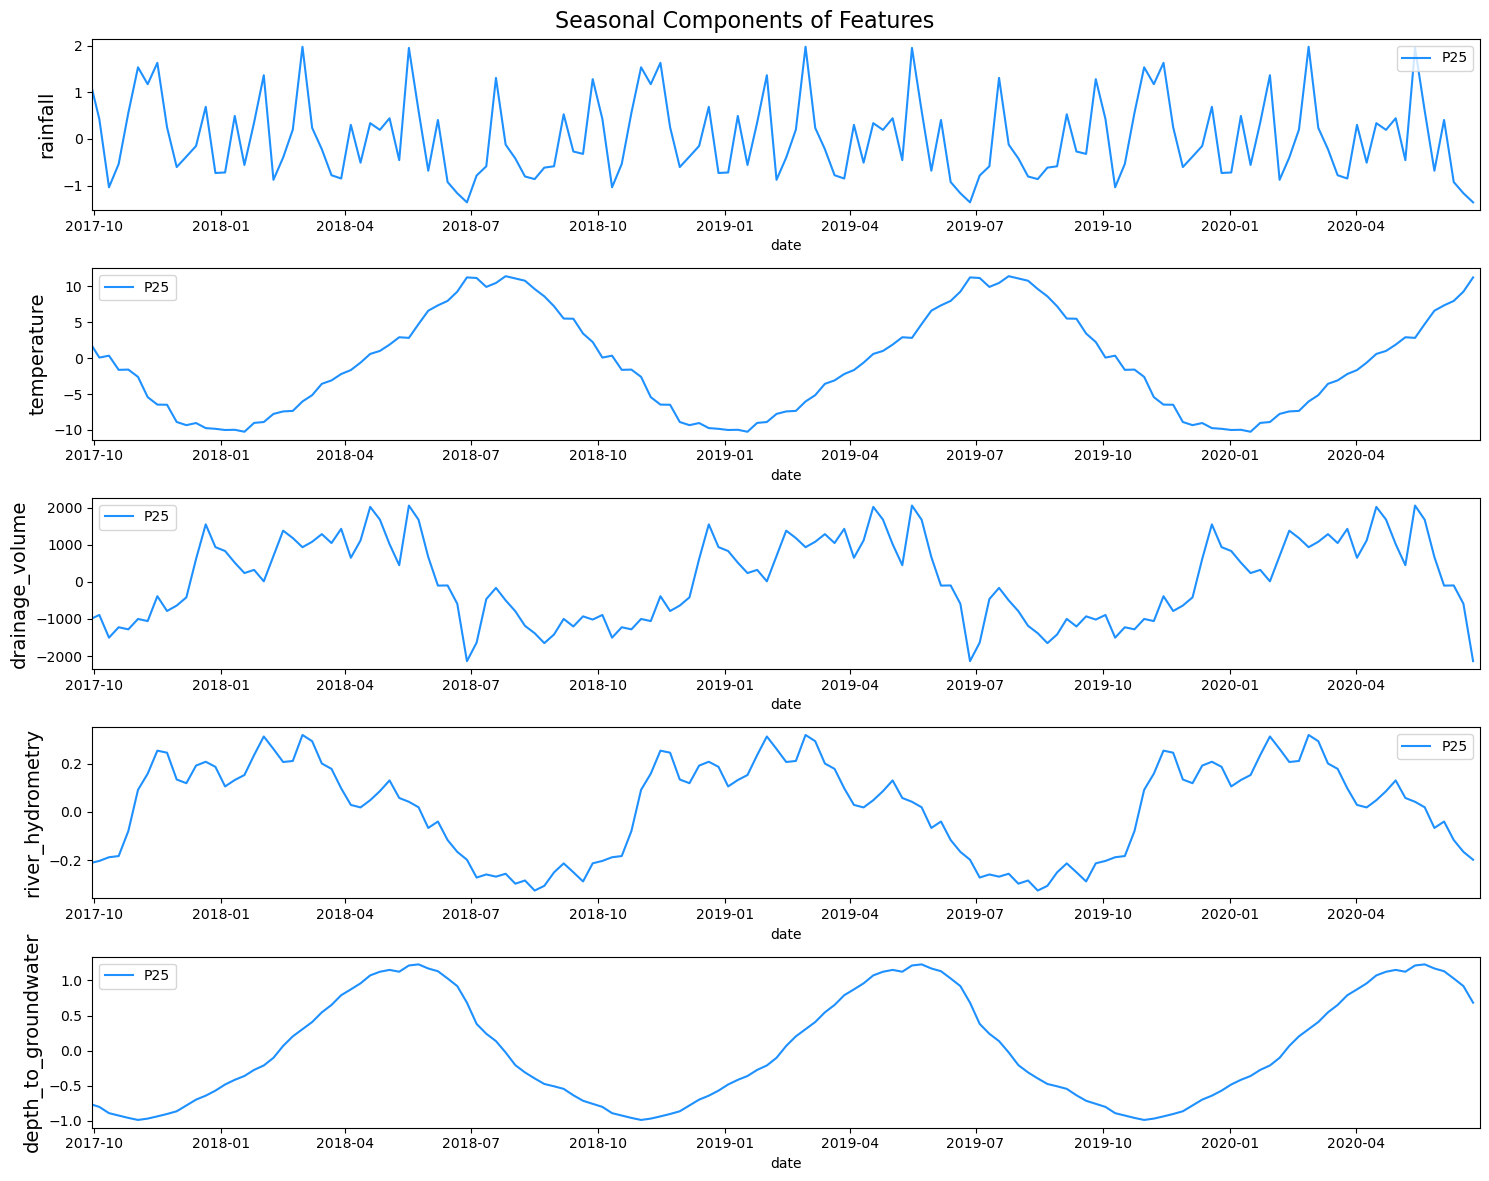

In [29]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=data['date'], y=data[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()


As we can see:

* depth_to_groundwater: reaches its maximum around May/June and its minimum around November
* temperature: reaches its maxmium around August and its minimum around January
* drainage_volume: reaches its minimum around July.
* river_hydrometry: reaches its maximum around February/March and its minimum around September


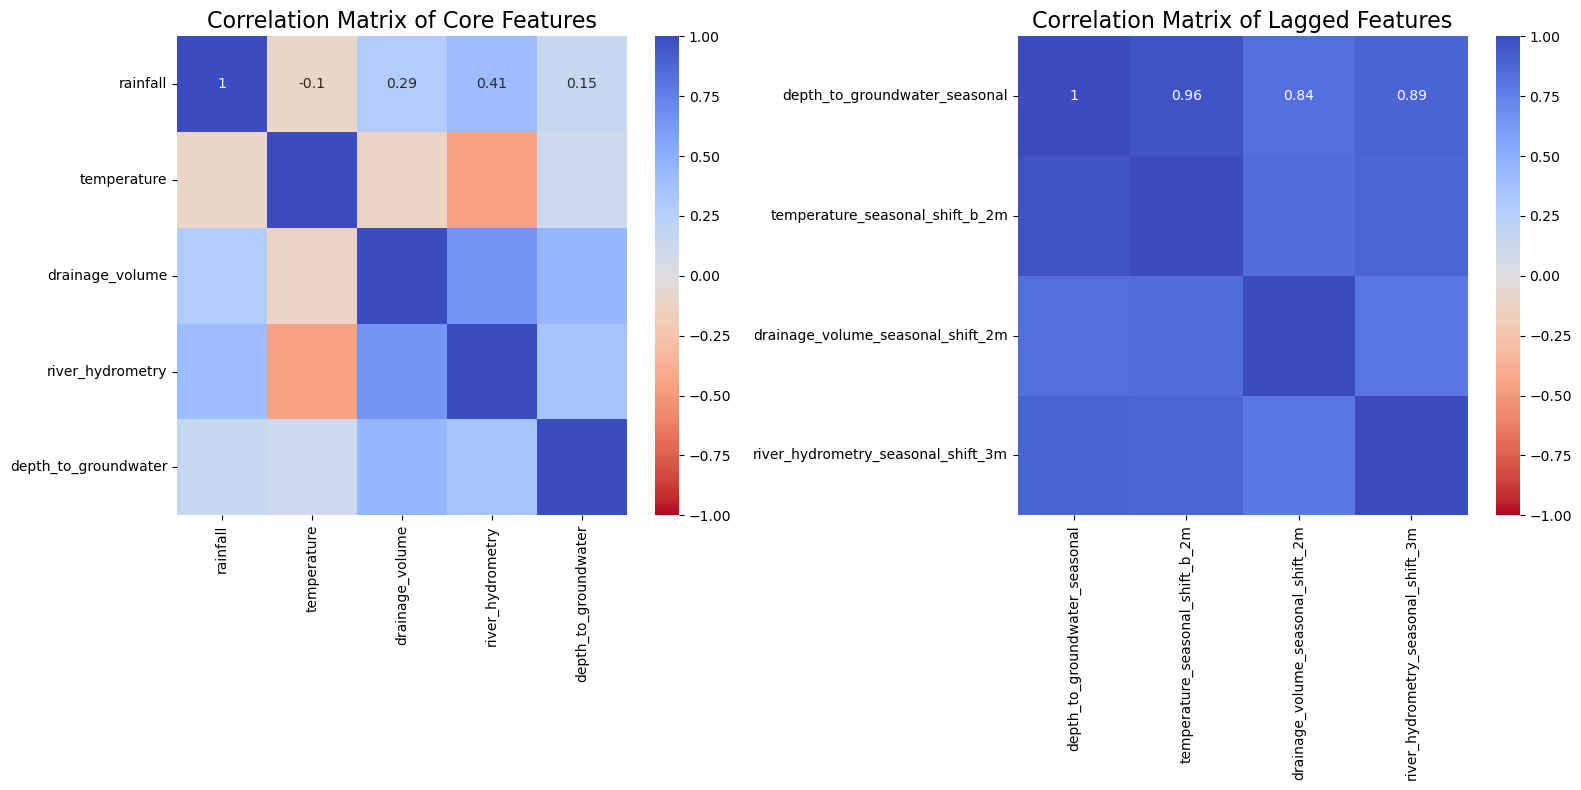

In [30]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = data[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'depth_to_groundwater_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]
corrmat = data[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

As we can see, the features are higher correlated in the case of shifted features (lagged ones) than the original ones.

### Autocorrelation Analysis

ACF and PACF plots: After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. Of course, with software like Statgraphics, you could just try some different combinations of terms and see what works best. But there is a more systematic way to do this. By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

* Autocorrelation Function (ACF): P = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series. P corresponds with MA parameter
* Partial Autocorrelation Function (PACF): D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary. D corresponds with AR parameter.
Autocorrelation plots help in detecting seasonality.

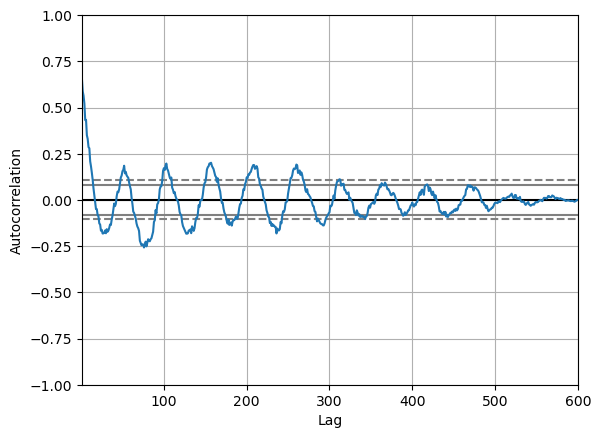

In [31]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['depth_to_groundwater_diff_1'])
plt.show()

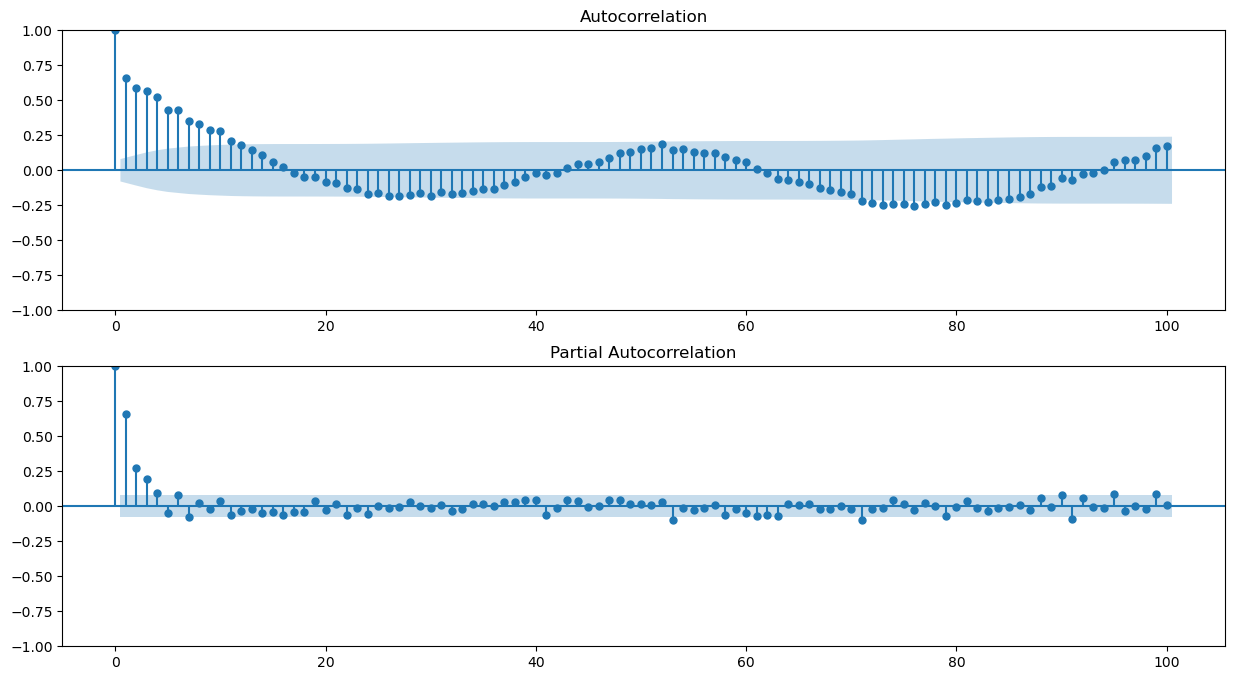

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plot_acf(data['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(data['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])
plt.show()

### Modelling

Time series can be either univariate or multivariate:

* Univariate time series only has a single time-dependent variable.
* Multivariate time series have a multiple time-dependent variable.

But, first of all we are going to see how does cross-validation technic works in TimeSeries Analysis.

In [33]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = data['date']
y = data['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

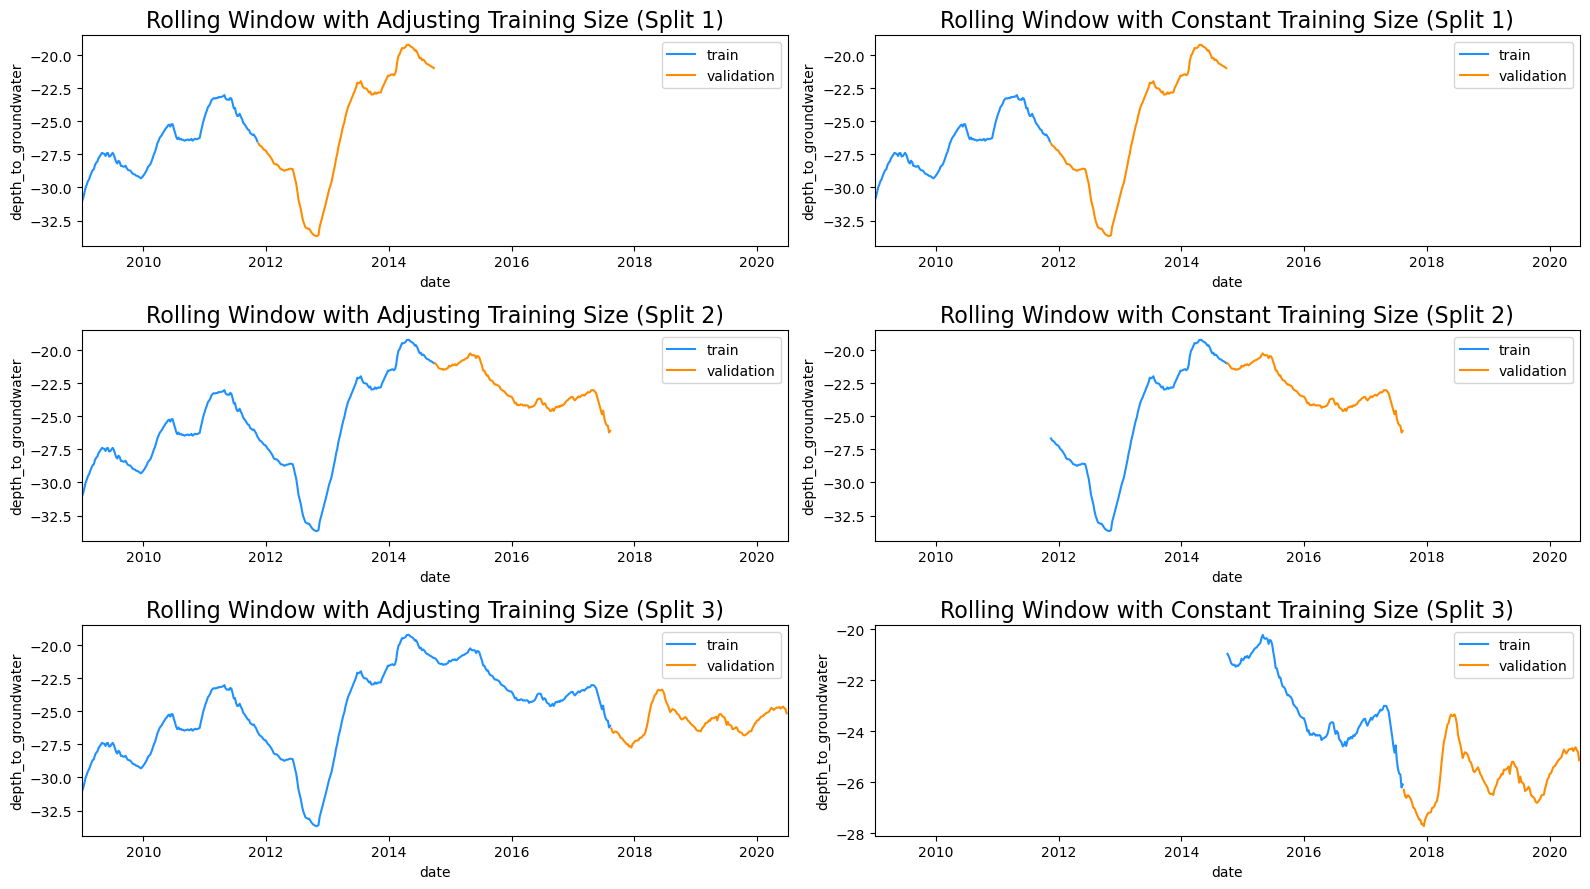

In [34]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

The idea with this plot is to understand which train and test set are we using to fit the model in each iteration.